# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ID                                           sequence category
0  NM_001368254.1  GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...       NM
1  NM_001350977.1  TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...       NM

### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Simulation parameters
SIM_TIME = 3600*12 # 12 hours
NUMBER_RESOURCES = 1e+4
NUMBER_RNA_POLYMERASES = 100
NUMBER_RIBOSOMES = 30
NUMBER_RNA_TRANSFER = 800
URACIL_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
ADENINE_INITIAL_AMOUNT = random.randint(4e+4, 6e+4)
GUANINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
CYTOSINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)

In [4]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    number_rna_transfers_per_codon=NUMBER_RNA_TRANSFER,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=True
    )

Simulation environment initialized, time unit: 0.0001 second.


In [5]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
100 RNA polymerases,
30 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases.


In [6]:
print(repr(protein_synthesis_process))

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
100 RNA polymerases,
30 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases,
748 transfer RNA for UUU codon,
726 transfer RNA for UCU codon,
790 transfer RNA for UAU codon,
782 transfer RNA for UGU codon,
777 transfer RNA for UUC codon,
755 transfer RNA for UCC codon,
746 transfer RNA for UAC codon,
859 transfer RNA for UGC codon,
742 transfer RNA for UUA codon,
871 transfer RNA for UCA codon,
828 transfer RNA for UAA codon,
728 transfer RNA for UGA codon,
727 transfer RNA for UUG codon,
743 transfer RNA for UCG codon,
775 transfer RNA for UAG codon,
779 transfer RNA for UGG codon,
849 transfer RNA for CUU codon,
874 transfer RNA for CCU codon,
726 transfer RNA for CAU codon,
863 transfer RNA for CGU codon,
770 transfer RNA for CUC codon,
859 transfer RNA for CCC codon,
827 transfer RNA for CAC codon,
776 transfer RNA for CGC codon,
834 transfer RNA for 

Start simulation:

In [7]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
Time 0.0000: DNA Sequence 0 requesting to start synthesis
Time 0.0000: DNA Sequence 0 synthesize started
Time 0.0000: DNA Sequence 0 start transcription process
Time 0.0000: DNA Sequence 0 contains 6 promoters
Time 0.0000: DNA Sequence 0 (mRNA sequence 0) start transcription process
Time 5.5666: DNA Sequence 1 requesting to start synthesis
Time 5.5666: DNA Sequence 1 synthesize started
Time 5.5666: DNA Sequence 1 start transcription process
Time 5.5666: DNA Sequence 1 contains 1 promoters
Time 5.5666: DNA Sequence 1 (mRNA sequence 0) start transcription process
Time 10.0300: DNA Sequence 0 start translation process
Time 10.0300: DNA Sequence 0 (mRNA sequence 0) start translation process
Time 26.1489: DNA Sequence 2 requesting to start synthesis
Time 26.1489: DNA Sequence 2 synthesize started
Time 26.1489: DNA Sequence 2 start transcription process
Time 26.1489: DNA Sequence 2 contains 1 promoters
Time 26.1489: DNA Sequence 2 (mRNA sequence 0) start transcription proc

In [8]:
TEST_NAME='test'
protein_synthesis_process.save_process(folder_test_name=TEST_NAME) # save the process

Process saved.


### Results

In [9]:
import pandas as pd
results_path = 'results/'+TEST_NAME+'/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [10]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 1595
Number of DNA sequence not traslated: 111


In [11]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_per_mrna', 
    'length_proteins', 'number_different_proteins']].head()

polypeptides_chains  \
257            ['NH2-TSEIFINSSSFYDKTYNSTDNVKMKD-COOH']   
451                                     ['NH2-E-COOH']   
533  ['NH2-SPSVDSSQLPFTTTTQTSALPIARRLLFCSGEDEVTLSGA...   
882                                   ['NH2-SEV-COOH']   
883  ['NH2-TTILMAMDDNSNNNVDTGDNNFSTHCRDRIRSTLRTILDS...   

     number_of_proteins_synthesized number_of_proteins_synthesized_per_mrna  \
257                               4                                     [4]   
451                               2                                     [2]   
533                               2                                     [2]   
882                              23                                    [23]   
883                              39                       [1, 11, 6, 6, 15]   

        length_proteins  number_different_proteins  
257                [26]                        1.0  
451                 [1]                        1.0  
533                [46]                        1.0  
882                 [3]                        1.0  
883  [44, 3, 10, 21, 4]                        5.0

In [12]:
results_df[results_df['mrna_sequences'].notna()][
    ['request_start_process_time', 'start_process_time', 'end_process_time',
    'number_different_proteins', 'number_of_proteins_synthesized']
    ].describe()

request_start_process_time  start_process_time  end_process_time  \
count                 1595.000000         1595.000000       1595.000000   
mean                 21439.559490        21439.559490      21741.355197   
std                  12386.918052        12386.918052      12385.310761   
min                      0.000000            0.000000        143.624300   
25%                  10863.384100        10863.384100      11175.546250   
50%                  21367.052100        21367.052100      21625.896900   
75%                  32057.529150        32057.529150      32420.236300   
max                  43115.382600        43115.382600      43196.494500   

       number_different_proteins  number_of_proteins_synthesized  
count                1595.000000                     1595.000000  
mean                    2.356740                       14.952351  
std                     2.538785                       17.461095  
min                     0.000000                        1.000000  
25%                     1.000000                        4.000000  
50%                     2.000000                       10.000000  
75%                     3.000000                       20.000000  
max                    47.000000                      245.000000

### Protein Length

In [13]:
from src.utils.plot_utils import *

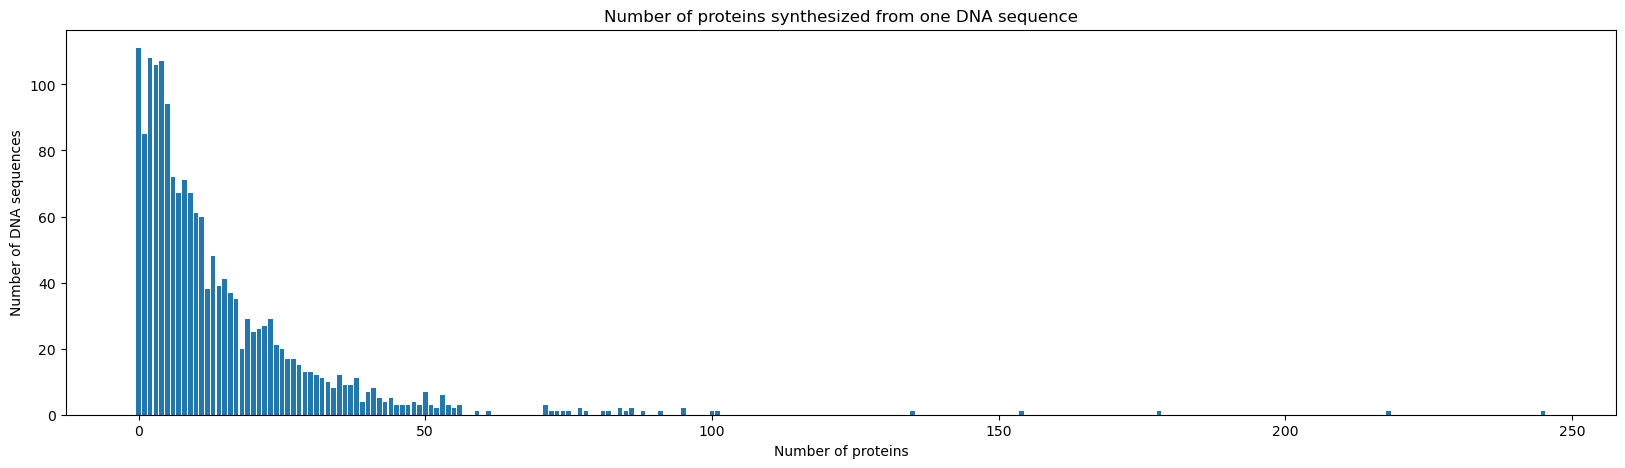

In [14]:
barplot_proteins_number(results_df)

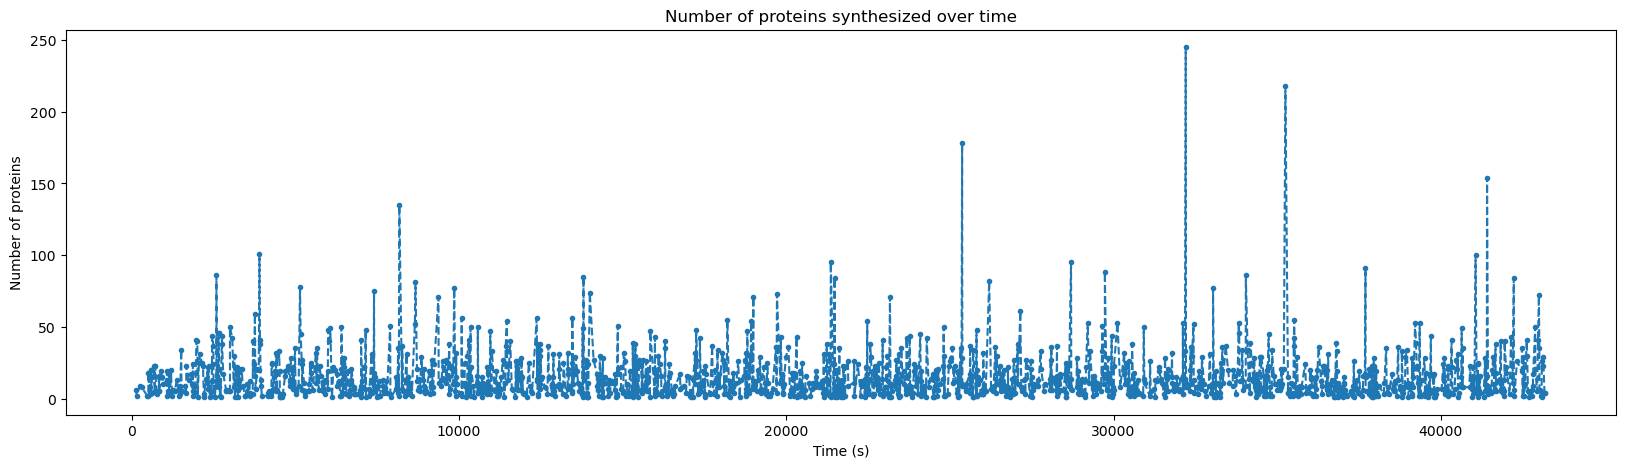

In [15]:
plot_proteins_number_over_time(results_df)

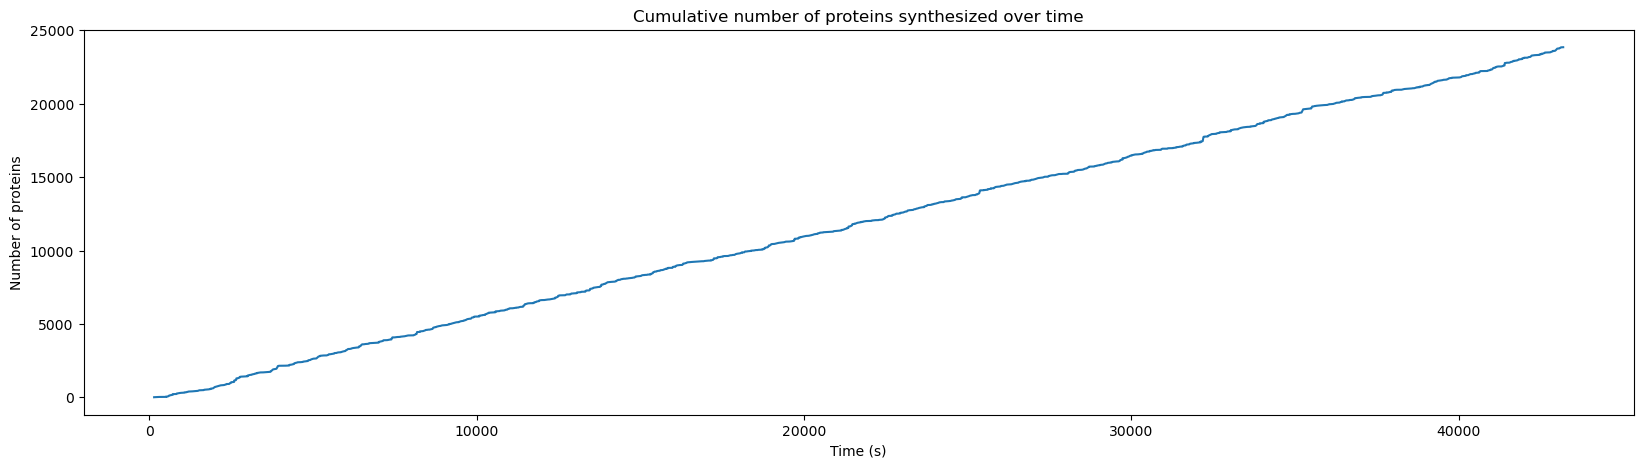

In [16]:
plot_cumulative_proteins_number_over_time(results_df)

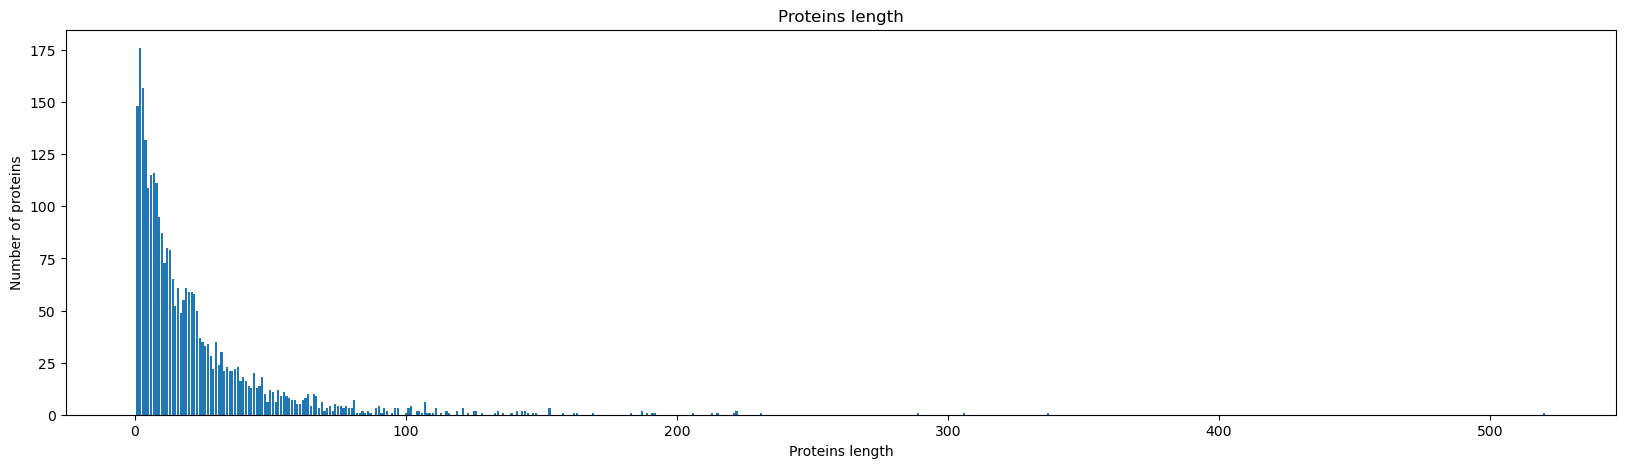

In [17]:
barplot_proteins_length(results_df)

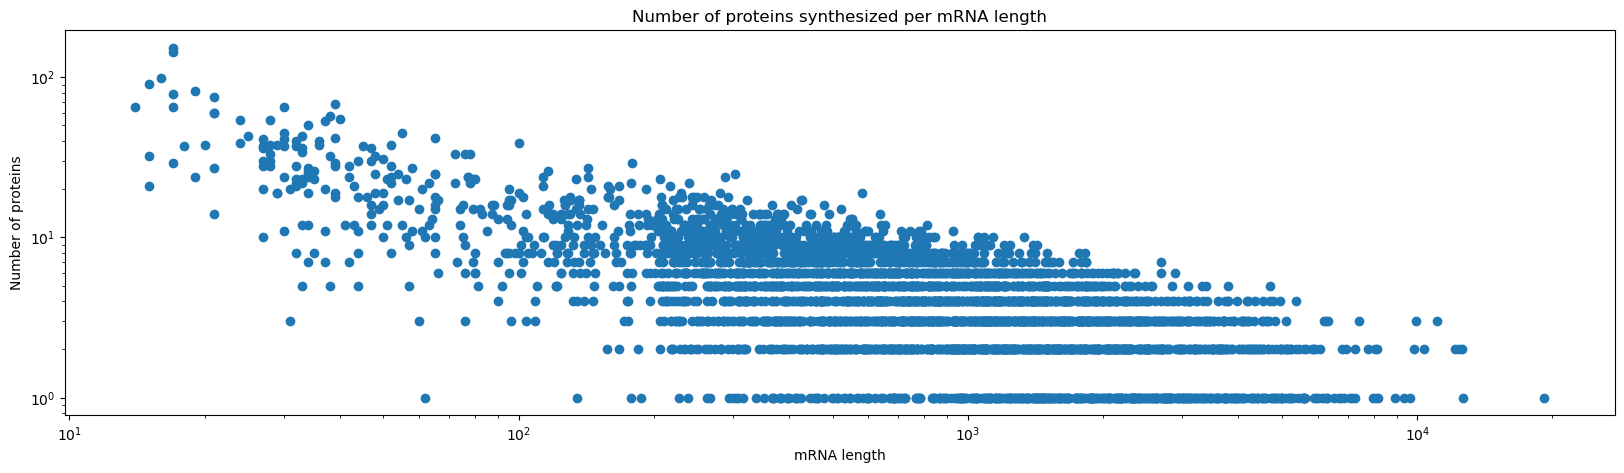

In [18]:
plot_number_proteins_per_length_mrna(results_df)

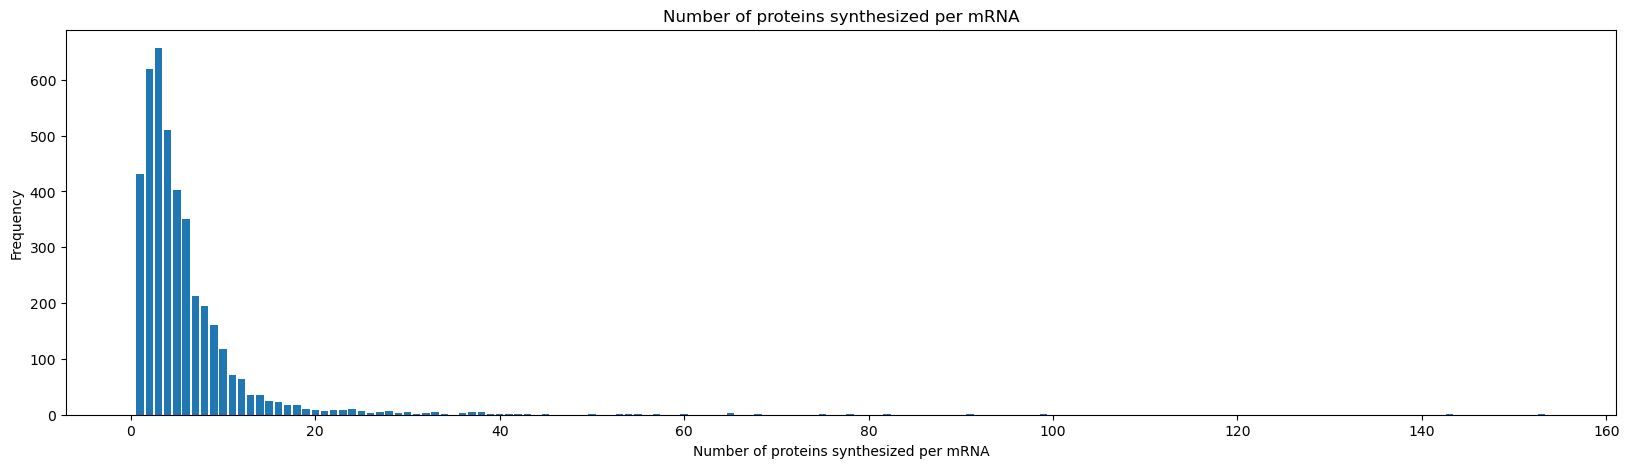

In [19]:
barplot_number_proteins_per_mrna(results_df)

### Process time

Whole process:

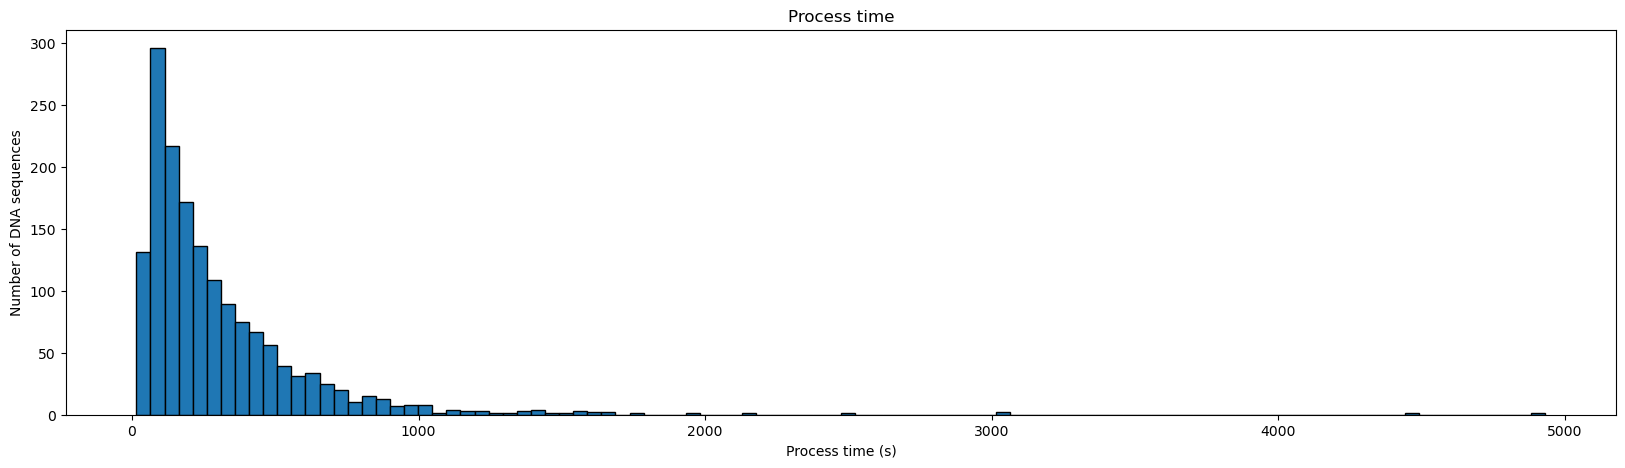

In [20]:
hist_process_time(results_df)

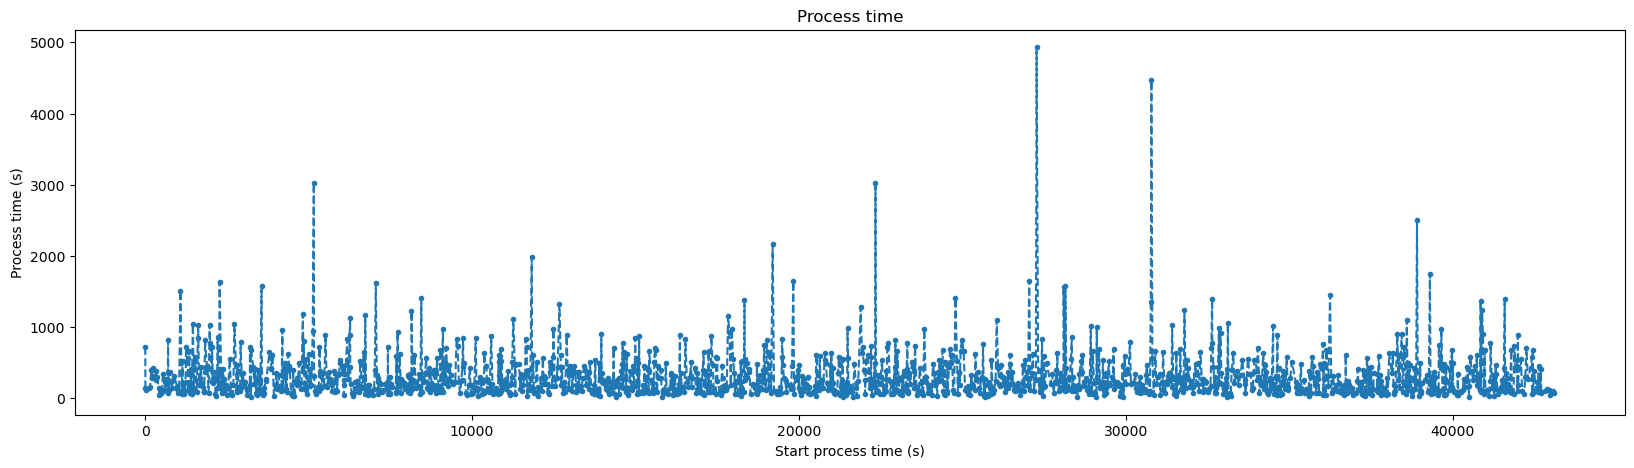

In [21]:
plot_process_time(results_df)

mRNA lifetime:

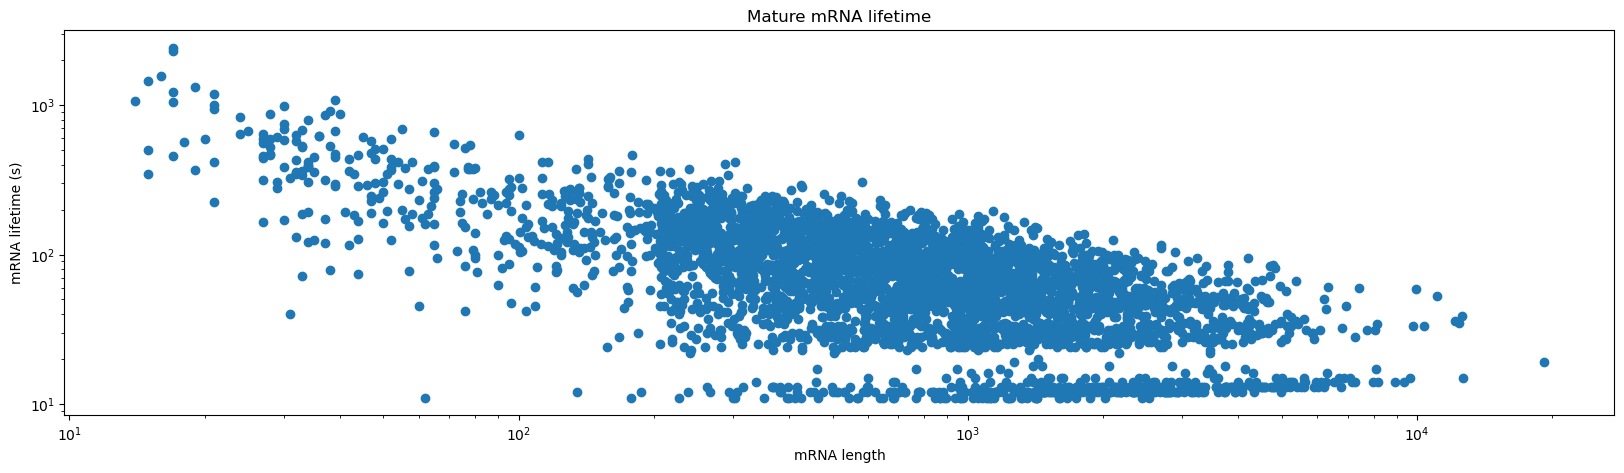

In [22]:
plot_mrna_lifetime(results_df)

### Nucleotides Level

In [23]:
import json

with open('results/test/nucleotides/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

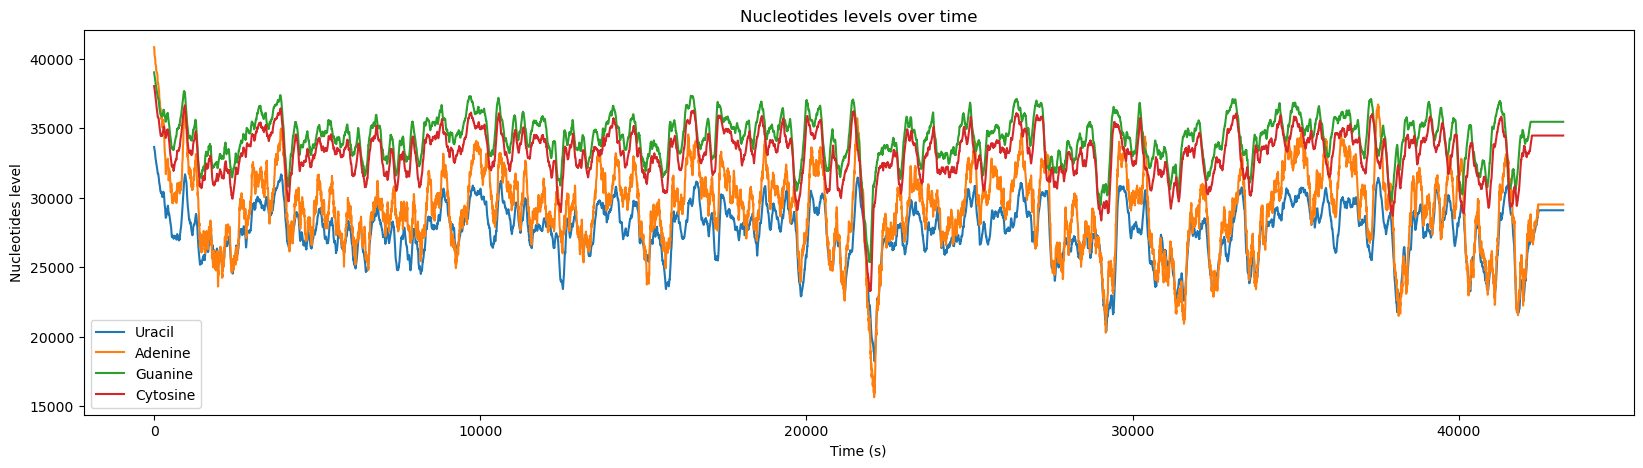

In [24]:
plot_nucleotide_level_over_time(uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)

### RNA Polymerase

In [25]:
with open('results/'+TEST_NAME+'/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [26]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [27]:
rna_polymerase_df.describe() # values in seconds

queue  request_time  available_time  wait_time      end_time  \
count  4125.0   4125.000000     4125.000000     4125.0   4125.000000   
mean      0.0  21758.885141    21758.885141        0.0  21782.688682   
std       0.0  12463.024333    12463.024333        0.0  12463.305501   
min       0.0      0.000000        0.000000        0.0     10.030000   
25%       0.0  10904.686800    10904.686800        0.0  10938.159200   
50%       0.0  22048.603300    22048.603300        0.0  22068.313300   
75%       0.0  32230.353500    32230.353500        0.0  32254.826200   
max       0.0  43176.453600    43176.453600        0.0  43190.603600   

        usage_time  
count  4125.000000  
mean      7.645984  
std       6.547681  
min       0.000400  
25%       2.704900  
50%       5.960800  
75%      10.570000  
max      43.894100

### Ribosome

In [28]:
with open('results/'+TEST_NAME+'/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [29]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [30]:
ribosome_df.describe()

queue  request_time  available_time  wait_time      end_time  \
count  29079.0  29079.000000    29079.000000    29079.0  29079.000000   
mean       0.0  21915.138398    21915.138398        0.0  21926.951547   
std        0.0  12419.343580    12419.343580        0.0  12419.315642   
min        0.0     10.030000       10.030000        0.0     21.515000   
25%        0.0  11182.820600    11182.820600        0.0  11194.838850   
50%        0.0  22147.611900    22147.611900        0.0  22160.884300   
75%        0.0  32508.278450    32508.278450        0.0  32520.262450   
max        0.0  43186.048700    43186.048700        0.0  43198.032700   

         usage_time  
count  2.907900e+04  
mean   1.481621e+00  
std    1.424495e+00  
min    2.426532e-09  
25%    4.412000e-01  
50%    1.045200e+00  
75%    2.082200e+00  
max    1.201000e+01

Resources request wait time:

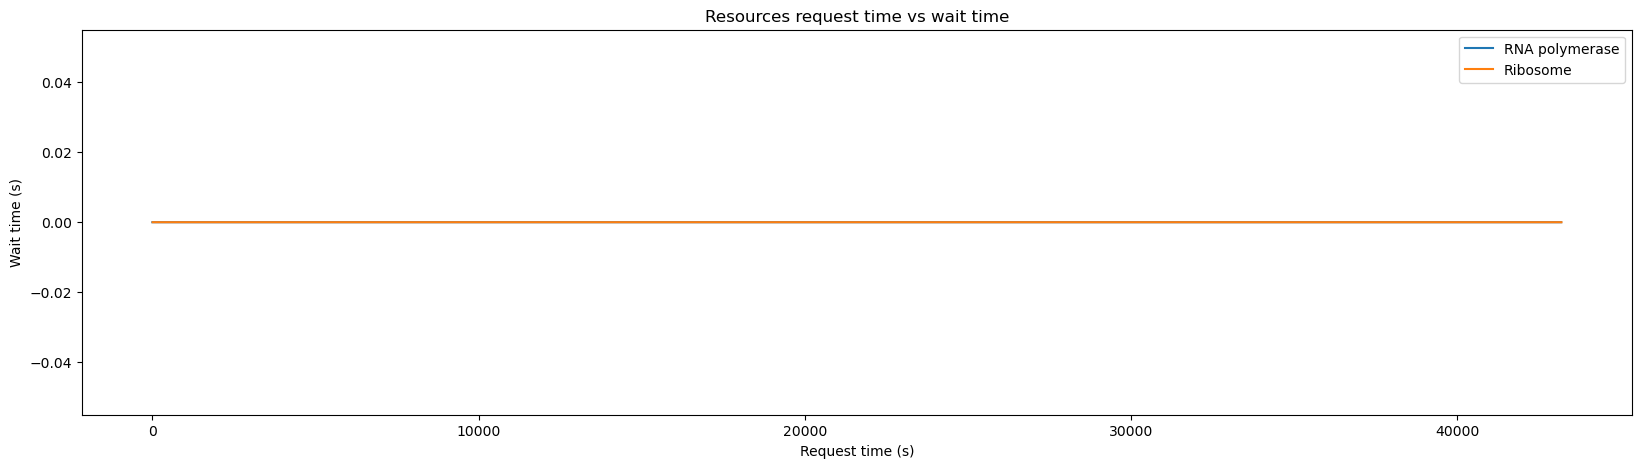

In [31]:
resources_request_wait_time(rna_polymerase_df, ribosome_df)

### Transfer RNA

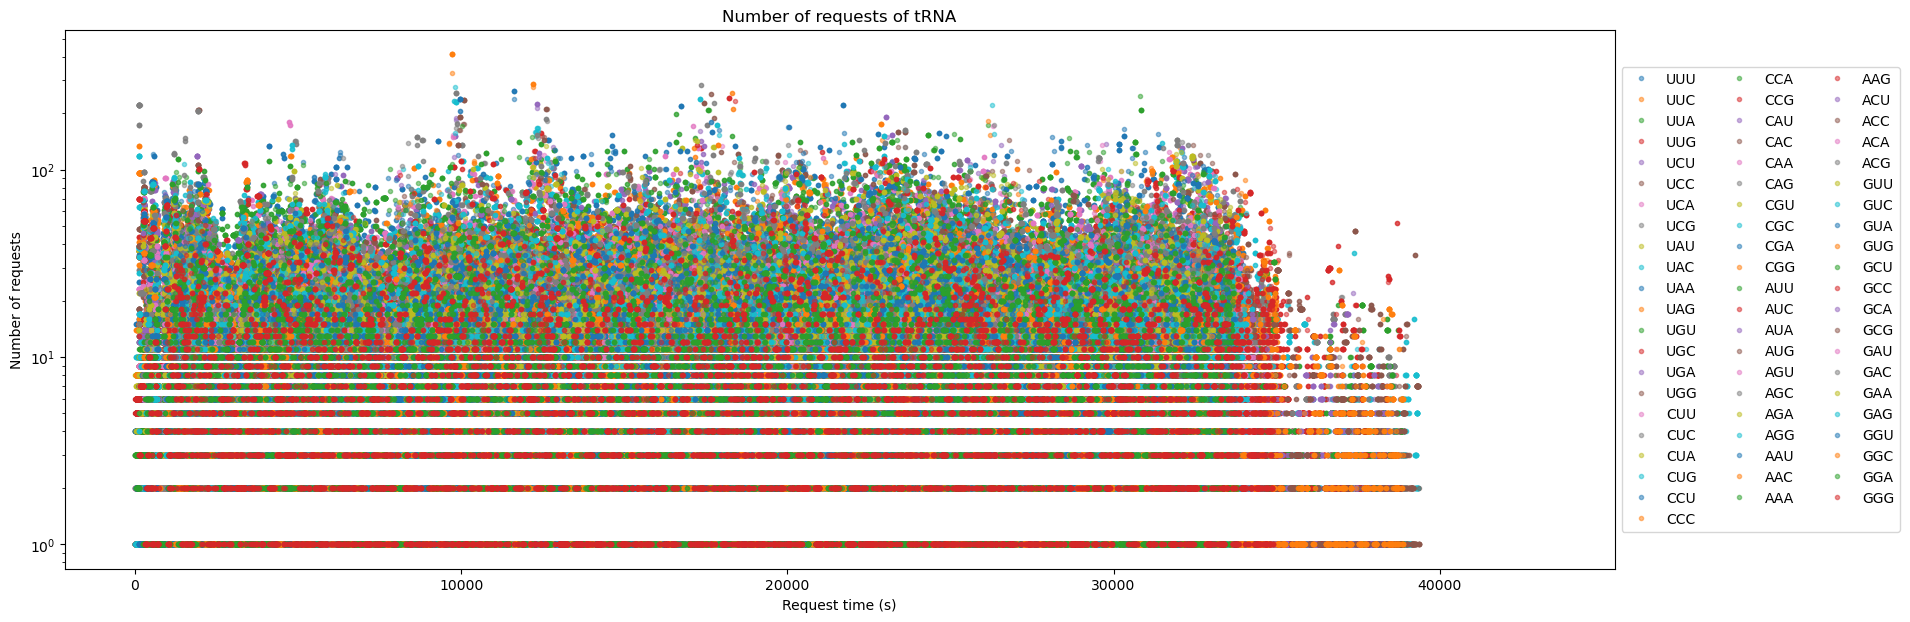

In [32]:
plot_codons_request(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)

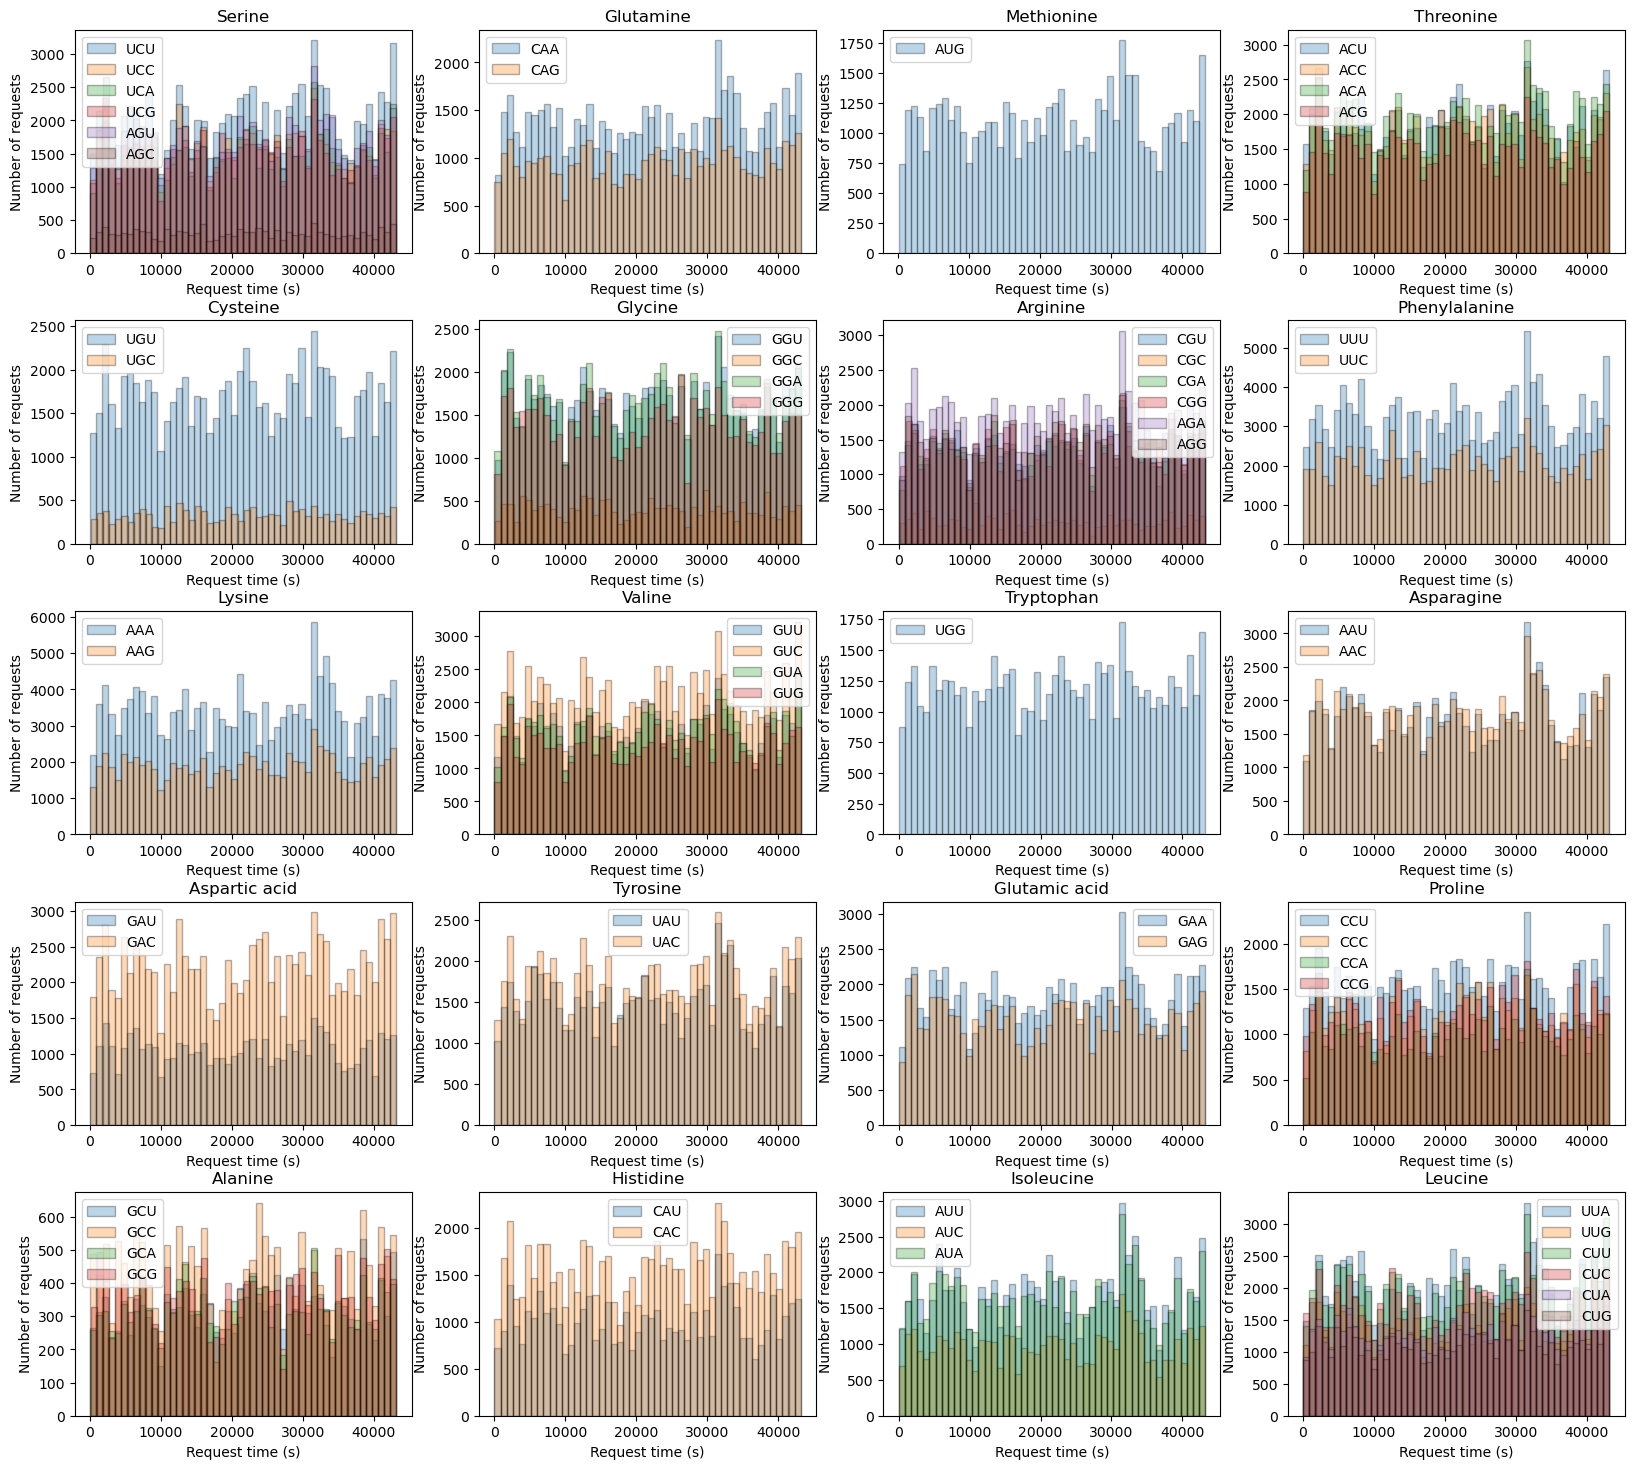

In [33]:
plot_codons_request_per_aminoacid(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)